In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import math
import sys
import multivelo as mv
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import requests
# from dtw import *

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [3]:
rna_url = "https://figshare.com/ndownloader/files/40064350"
atac_url = "https://figshare.com/ndownloader/files/40064347"

rna_path = "data/datasets/human_brain_rna_after_filt_r2.h5ad"
atac_path = "data/datasets/human_brain_atac_gene_after_filt_r2.h5ad"

In [25]:
adata_rna = sc.read(rna_path, backup_url=rna_url)
adata_atac = sc.read(atac_path, backup_url=atac_url)

In [28]:
adata_rna.layers["spliced"].shape

(4693, 954)

In [29]:
adata_rna.layers["unspliced"].shape

(4693, 954)

In [30]:
adata_rna

AnnData object with n_obs × n_vars = 4693 × 954
    obs: 'cluster', 'batch', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'cluster_colors', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

In [198]:
adata_rna.X = adata_rna

AnnData object with n_obs × n_vars = 6436 × 962
    layers: 'Mc'
    obsp: 'connectivities'

In [147]:
adata_rna.obs

,celltype,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,initial_size_spliced,initial_size_unspliced,initial_size,n_counts
atac.bc,,,,,,,,,
"R1.01,R2.06,R3.83,P1.07",TAC-1,331,529.0,0.0,0.0,529,702,529.0,319.837402
"R1.01,R2.11,R3.86,P1.08",TAC-1,531,745.0,0.0,0.0,745,979,745.0,348.535522
"R1.01,R2.15,R3.09,P1.07",TAC-1,251,464.0,0.0,0.0,464,732,464.0,259.254272
"R1.01,R2.17,R3.81,P1.05",TAC-1,263,438.0,0.0,0.0,438,667,438.0,309.253387
"R1.01,R2.18,R3.95,P1.06",TAC-1,297,820.0,0.0,0.0,820,1000,820.0,202.756104
...,...,...,...,...,...,...,...,...,...
"R1.96,R2.73,R3.72,P1.08",Hair Shaft-cuticle.cortex,58,132.0,0.0,0.0,132,208,132.0,196.340897
"R1.96,R2.82,R3.52,P1.07",Hair Shaft-cuticle.cortex,233,349.0,0.0,0.0,349,1107,349.0,337.676239
"R1.96,R2.83,R3.68,P1.06",Hair Shaft-cuticle.cortex,247,738.0,0.0,0.0,738,784,738.0,168.963394


In [178]:
adata_rna.layers["matrix"].shape

(6436, 962)

recovering dynamics (using 1/20 cores)


  0%|          | 0/509 [00:00<?, ?gene/s]

    finished (0:03:58) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/20 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:12) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


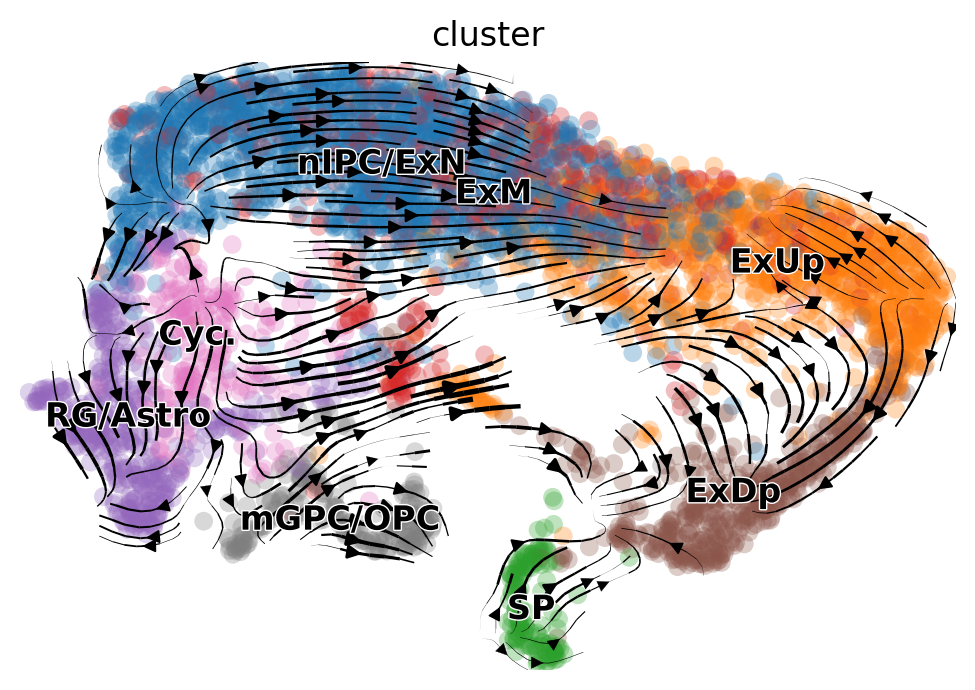

In [5]:
scv.tl.recover_dynamics(adata_rna)
scv.tl.velocity(adata_rna, mode="dynamical")
scv.tl.velocity_graph(adata_rna, n_jobs=1)
scv.tl.latent_time(adata_rna)
scv.pl.velocity_embedding_stream(adata_rna, basis='umap', color='cluster')

In [6]:

adata_result = mv.recover_dynamics_chrom(adata_rna,
                                        adata_atac,
                                        max_iter=5,
                                        init_mode="invert",
                                        verbose=False,
                                        parallel=True,
                                        n_jobs = 15,
                                        save_plot=False,
                                        rna_only=False,
                                        fit=True,
                                        n_anchors=500,
                                        extra_color_key='cluster'
                                        )                                    

  0%|          | 0/954 [00:00<?, ?it/s]

In [8]:
mv.set_velocity_genes(adata_result, likelihood_lower=0.02)
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/20 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


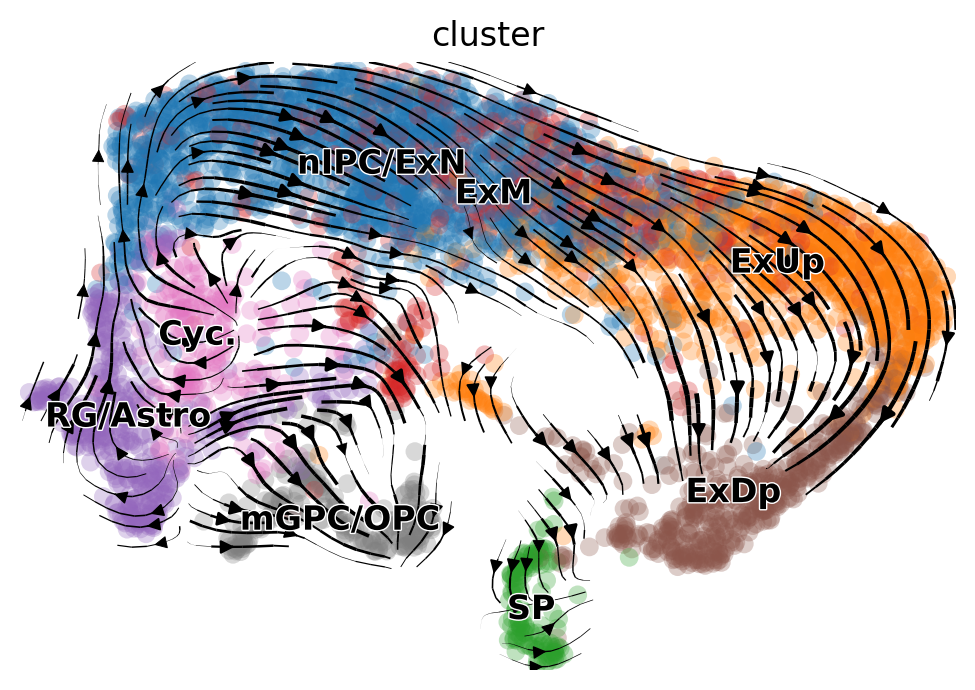

In [9]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='cluster', show=True)

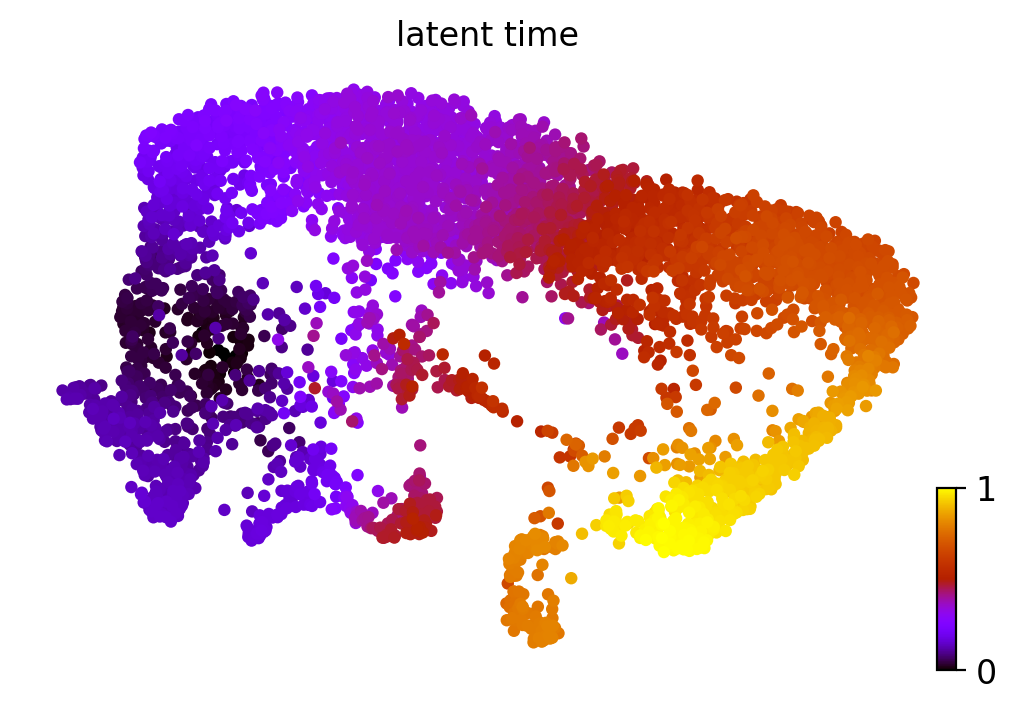

In [12]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80)

In [10]:
adata_rna.obs["latent_time" ] = adata_result.obs["latent_time"]

In [11]:
adata_rna.obs

,cluster,batch,n_counts,velocity_self_transition,root_cells,end_points,velocity_pseudotime,latent_time
hft_ctx_w21_dc2r2_r1_AAACAGCCACTAAATC,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.190280,4.147147e-04,0.000031,0.294686,0.325758
hft_ctx_w21_dc2r2_r1_AAACAGCCAGGTTCAC,ExUp,hft_ctx_w21_dc2r2_r1,408.000000,0.281279,9.163360e-04,0.000079,0.302500,0.332825
hft_ctx_w21_dc2r2_r1_AAACATGCAACACCTA,RG/Astro,hft_ctx_w21_dc2r2_r1,408.000000,0.000000,1.735281e-02,0.153019,0.093690,0.119754
hft_ctx_w21_dc2r2_r1_AAACATGCAGCACGTT,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.260557,5.690027e-04,0.000028,0.310943,0.331698
hft_ctx_w21_dc2r2_r1_AAACCAACAATTGCGC,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.158162,2.359675e-01,0.000002,0.248800,0.203155
...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA,nIPC/ExN,hft_ctx_w21_dc2r2_r2,407.999969,0.178077,1.063892e-03,0.000024,0.299317,0.327428
hft_ctx_w21_dc2r2_r2_TTTGGTGCAATAATGG,mGPC/OPC,hft_ctx_w21_dc2r2_r2,408.000000,0.380210,5.803065e-01,0.000337,0.091956,0.164153
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT,ExM,hft_ctx_w21_dc2r2_r2,408.000000,0.399336,1.044641e-07,0.001204,0.445678,0.671989
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,nIPC/ExN,hft_ctx_w21_dc2r2_r2,407.999969,0.409659,3.439829e-04,0.000081,0.309528,0.363060


In [12]:
adata_rna.write_h5ad( "data/datasets/human_brain_rna_after_filt_r2.h5ad")

In [52]:
import anndata as ad
rna_adata = ad.AnnData(adata_rna.layers["matrix"])
rna_adata.obs = adata_rna.obs
rna_adata.var = adata_rna.var

In [54]:
rna_adata.obs["latent_time" ] = adata_result.obs["latent_time"]

## Wrap up the rna and dna data to multi-modal adata

## Read the atac data row countt


In [ ]:
rna_adata = ad.AnnData(adata_rna.layers["matrix"])

In [25]:
from scipy.sparse import coo_matrix
import anndata as ad

atac_adata = sc.read_text("/mnt/data0/halo/BH/multiome/atac_matrix.tsv.gz")
atac_adata

AnnData object with n_obs × n_vars = 467315 × 8981

In [34]:
celltypes =  pd.read_csv("/mnt/data0/halo/BH/multiome/atac_barcodes.txt.gz", delimiter='\t')
celltypes

,Cell.ID,Sample.ID,Sample.Age,Sample.Batch,Cell.Barcode,RNA.Counts,RNA.Features,Dissociation.ID,percentMT,percentRibo,...,DF_classification,DF_pANN_quantile,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,nCount_ambiguous,nFeature_ambiguous,RNA_snn_res.0.5,seurat_clusters
0,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACAGCCAGCAATAA,2494,1435,A,0.000796,0.017516,...,Singlet,0.728919,456,383,1374,791,111,89,10,c10
1,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACAGCCAGCTCATA,2257,1288,A,0.012798,0.033098,...,Singlet,0.601585,477,369,1163,692,118,89,2,c2
2,hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCACGTTACA,3485,1632,A,0.031098,0.039372,...,Singlet,0.378325,736,526,1807,902,181,124,0,c0
3,hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCATAAACCT,2266,1247,A,0.012319,0.021557,...,Singlet,0.378325,430,331,1230,686,106,80,4,c4
4,hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCATTTAAGC,2741,1495,A,0.012341,0.020690,...,Singlet,0.568761,525,414,1526,851,129,111,4,c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8976,hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGGTGCATGAATAG,4538,1910,B,0.006583,0.010753,...,Singlet,0.671129,722,539,2684,1134,242,174,4,c4
8977,hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTCCCAGTTTACG,5925,2155,B,0.012747,0.012244,...,Singlet,0.603111,715,547,3890,1400,274,188,4,c4
8978,hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTCTAGTGAGCAA,3496,1631,B,0.003410,0.025291,...,Singlet,0.639291,546,417,2145,1020,180,127,2,c2
8979,hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTGAAGACAGGCG,4099,1935,B,0.061999,0.044979,...,Singlet,0.211650,996,703,1932,993,211,172,0,c0


In [35]:
celltypes[["Cell.ID", "Sample.ID", "Cell.Barcode", "Sample.Batch"]]

,Cell.ID,Sample.ID,Cell.Barcode,Sample.Batch
0,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,hft_ctx_w21_dc1r3_r1,AAACAGCCAGCAATAA,b2020_11
1,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,hft_ctx_w21_dc1r3_r1,AAACAGCCAGCTCATA,b2020_11
2,hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,hft_ctx_w21_dc1r3_r1,AAACATGCACGTTACA,b2020_11
3,hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,hft_ctx_w21_dc1r3_r1,AAACATGCATAAACCT,b2020_11
4,hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,hft_ctx_w21_dc1r3_r1,AAACATGCATTTAAGC,b2020_11
...,...,...,...,...
8976,hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,hft_ctx_w21_dc2r2_r2,TTTGGTGCATGAATAG,b2020_11
8977,hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,hft_ctx_w21_dc2r2_r2,TTTGTCCCAGTTTACG,b2020_11
8978,hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,hft_ctx_w21_dc2r2_r2,TTTGTCTAGTGAGCAA,b2020_11
8979,hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,hft_ctx_w21_dc2r2_r2,TTTGTGAAGACAGGCG,b2020_11


In [36]:
celltypes = celltypes.set_index("Cell.ID")
celltypes

,Sample.ID,Sample.Age,Sample.Batch,Cell.Barcode,RNA.Counts,RNA.Features,Dissociation.ID,percentMT,percentRibo,CR_Estimated.number.of.cells,...,DF_classification,DF_pANN_quantile,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,nCount_ambiguous,nFeature_ambiguous,RNA_snn_res.0.5,seurat_clusters
Cell.ID,,,,,,,,,,,,,,,,,,,,,
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACAGCCAGCAATAA,2494,1435,A,0.000796,0.017516,3534,...,Singlet,0.728919,456,383,1374,791,111,89,10,c10
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACAGCCAGCTCATA,2257,1288,A,0.012798,0.033098,3534,...,Singlet,0.601585,477,369,1163,692,118,89,2,c2
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCACGTTACA,3485,1632,A,0.031098,0.039372,3534,...,Singlet,0.378325,736,526,1807,902,181,124,0,c0
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCATAAACCT,2266,1247,A,0.012319,0.021557,3534,...,Singlet,0.378325,430,331,1230,686,106,80,4,c4
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCATTTAAGC,2741,1495,A,0.012341,0.020690,3534,...,Singlet,0.568761,525,414,1526,851,129,111,4,c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGGTGCATGAATAG,4538,1910,B,0.006583,0.010753,2764,...,Singlet,0.671129,722,539,2684,1134,242,174,4,c4
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTCCCAGTTTACG,5925,2155,B,0.012747,0.012244,2764,...,Singlet,0.603111,715,547,3890,1400,274,188,4,c4
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTCTAGTGAGCAA,3496,1631,B,0.003410,0.025291,2764,...,Singlet,0.639291,546,417,2145,1020,180,127,2,c2


In [30]:
atac_adata = atac_adata.T


In [38]:
atac_adata.obs = celltypes[["Sample.ID", "Cell.Barcode", "Sample.Batch"]]

In [20]:
atac_adata.obs

AnnData object with n_obs × n_vars = 8981 × 467315
    obs: 'Cell.ID', 'Sample.ID', 'Cell.Barcode', 'Sample.Batch'

In [39]:
atac_adata.obs.index[0]

'hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA'

In [40]:
atac_adata = atac_adata[adata_rna.obs.index, ]
atac_adata

View of AnnData object with n_obs × n_vars = 4693 × 467315
    obs: 'Sample.ID', 'Cell.Barcode', 'Sample.Batch'

In [46]:
atac_var = pd.read_csv("/mnt/data0/halo/BH/multiome/atac_features.txt.gz", delimiter="\t")
atac_var

,seqnames,start,end,width,strand,name,score,foldChange,negLog10pval,negLog10qval,summitOffset,summit,calledPeakStart,calledPeakEnd,score_norm
0,chr1,180451,180951,501,*,c7_peak_1,46,3.88524,4.64387,2.81209,74,180701,180627,180781,0.276929
1,chr1,181254,181754,501,*,c2_peak_1,158,8.51952,15.88252,13.89216,108,181504,181396,181679,0.587983
2,chr1,191223,191723,501,*,c9_peak_1,583,26.95289,58.38866,55.40767,229,191473,191244,191626,0.929462
3,chr1,630059,630559,501,*,c6_peak_5,267,11.74720,26.72178,24.64570,191,630309,630118,630403,0.676256
4,chr1,633776,634276,501,*,c8_peak_4,212,11.92563,21.28940,19.01094,95,634026,633931,634126,0.705062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467310,chr22,50756935,50757435,501,*,c5_peak_81501,84,5.78499,8.45449,6.53506,87,50757185,50757098,50757276,0.372161
467311,chr22,50760237,50760737,501,*,c2_peak_113398,80,5.38075,8.09216,6.25464,76,50760487,50760411,50760572,0.430911
467312,chr22,50775143,50775643,501,*,c8_peak_104552,152,9.27549,15.24836,13.08098,245,50775393,50775148,50775509,0.626499
467313,chr22,50783378,50783878,501,*,c6_peak_126089b,2464,62.38167,246.41701,243.44730,451,50783628,50783177,50783903,0.950194


In [47]:
atac_adata.var = atac_var[["seqnames", "start", "end", "width"]]

In [ ]:
atac_adata.write_h5ad("humanbrain_atac.h5ad")

## read the RNA raw data

In [12]:
adata_rna.var

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,velocity_genes
A2M,-1.148467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ABCC9,0.067548,0.018682,0.106548,0.335109,4.752187,4.884805,0.054281,0.008612,5.614171e-07,0.0,0.0,0.338978,0.134795,0.039483,0.887407,1.368960,False
ABCG2,-0.101999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ABHD3,-0.028828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ABLIM1,0.847896,0.045911,0.037410,0.193036,20.018923,3.204713,0.382908,0.055111,4.051789e-01,0.0,0.0,0.383813,1.184660,0.155468,0.305179,3.659679,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF385B,0.901348,0.027281,0.015940,0.173837,20.512895,6.662917,0.473946,0.032009,3.440683e-01,0.0,0.0,0.266179,1.020215,0.122480,0.214133,4.263367,True
ZNF385D,0.821784,0.025346,0.017129,0.105419,20.123209,10.421962,0.352468,0.040772,2.866667e-01,0.0,0.0,0.364682,1.394375,0.181889,0.331606,6.752995,True
ZNF521,0.198104,0.014481,0.038230,0.219866,4.691317,31.076091,0.156919,0.008748,3.268292e-01,0.0,0.0,0.200977,0.419648,0.022643,0.438812,1.388854,True
ZNF536,0.478537,0.048824,0.051214,0.404495,6.132384,14.868103,0.353090,0.029092,2.302609e-01,0.0,0.0,0.183876,0.842901,0.076641,0.856243,1.532142,True


In [13]:
## read the RNA raw data 
rna_adata = sc.read_text("/mnt/data0/halo/BH/multiome/rna_counts.tsv.gz")
rna_adata

AnnData object with n_obs × n_vars = 34104 × 8981

In [14]:
rna_adata = rna_adata.T

In [19]:
celltypes =  pd.read_csv("/mnt/data0/halo/BH/multiome/atac_barcodes.txt.gz", delimiter='\t')
celltypes = celltypes.set_index("Cell.ID")
rna_adata.obs = celltypes[["Sample.ID", "Cell.Barcode", "Sample.Batch"]]
rna_adata

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data0/halo/BH/multiome/rna_barcodes.tsv.gz'

In [22]:
features = pd.read_csv("/mnt/data0/halo/BH/multiome/GSE162170_rna_cell_metadata.txt.gz", delimiter='\t')
features

,Cell.ID,Sample.ID,Age,Tissue.ID,Sample.Type,Assay,Batch,seurat_clusters,RNA.Counts,RNA.Features,Percent.MT,Percent.Ribo,Cell.Barcode,DF_pANN,DF_classification,DF_pANN_quantile,Spliced.Counts,Spliced.Features,Unspliced.Counts,Unspliced.Features,Ambiguous.Counts,Ambiguous.Features
0,hft_w20_p3_r1_AAACCCAAGCTGCGAA,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c16,1397,677,0.070866,0.272011,AAACCCAAGCTGCGAA,0.086339,Singlet,0.356997,1063,544,67,54,94,69
1,hft_w20_p3_r1_AAACCCAAGGTAGTAT,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c11,14338,4301,0.053200,0.179333,AAACCCAAGGTAGTAT,0.325683,Singlet,0.821429,10339,3514,5437,2526,1431,669
2,hft_w20_p3_r1_AAACCCACAACTCCAA,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c17,9260,3481,0.043511,0.204060,AAACCCACAACTCCAA,0.397814,Doublet,0.984402,6494,2701,6860,2515,1095,669
3,hft_w20_p3_r1_AAACCCACATAGTCAC,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c0,4025,1969,0.015396,0.137075,AAACCCACATAGTCAC,0.076503,Singlet,0.314723,2655,1475,5875,2058,634,377
4,hft_w20_p3_r1_AAACCCAGTACAGGTG,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c4,7131,2930,0.044690,0.140936,AAACCCAGTACAGGTG,0.239344,Singlet,0.746356,5008,2228,6026,2106,909,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57863,hft_w16_p7_r2_TTTGTTGCAGCACCCA,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c6,8532,3497,0.018749,0.136396,TTTGTTGCAGCACCCA,0.389488,Doublet,0.961542,6226,2730,4194,2059,973,612
57864,hft_w16_p7_r2_TTTGTTGCAGGCTACC,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c2,6689,2393,0.045577,0.246862,TTTGTTGCAGGCTACC,0.210916,Singlet,0.663941,4757,1877,3039,1362,677,396
57865,hft_w16_p7_r2_TTTGTTGGTCGCTTAA,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c2,3865,1799,0.035954,0.159079,TTTGTTGGTCGCTTAA,0.074798,Singlet,0.306766,2808,1409,1436,832,431,273
57866,hft_w16_p7_r2_TTTGTTGGTCGTACAT,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c2,5293,2365,0.032861,0.158074,TTTGTTGGTCGTACAT,0.208895,Singlet,0.660796,3660,1760,6166,2211,672,416


In [27]:
adata_rna

AnnData object with n_obs × n_vars = 4693 × 954
    obs: 'cluster', 'batch', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'cluster_colors', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

In [31]:
rna_adata = pd.read_csv("/mnt/data0/halo/BH/multiome/rna_counts.tsv.gz", delimiter='\t')
rna_adata.T

,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000239906,ENSG00000241860,ENSG00000241599,ENSG00000236601,ENSG00000284733,ENSG00000235146,ENSG00000284662,ENSG00000229905,ENSG00000237491,ENSG00000177757,ENSG00000228794,ENSG00000225880,ENSG00000230368,ENSG00000272438,ENSG00000230699,ENSG00000241180,ENSG00000223764,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000187642,ENSG00000272512,ENSG00000188290,ENSG00000187608,ENSG00000224969,ENSG00000188157,ENSG00000242590,ENSG00000273443,ENSG00000237330,ENSG00000131591,ENSG00000223823,ENSG00000272141,ENSG00000205231,ENSG00000162571,ENSG00000186891,ENSG00000186827,ENSG00000078808,ENSG00000176022,ENSG00000184163,ENSG00000260179,ENSG00000160087,ENSG00000230415,ENSG00000162572,ENSG00000131584,...,ENSG00000198692,ENSG00000280969,ENSG00000254488,ENSG00000183146,ENSG00000242875,ENSG00000234414,ENSG00000184991,ENSG00000244395,ENSG00000242389,ENSG00000169807,ENSG00000236951,ENSG00000131548,ENSG00000169800,ENSG00000215560,ENSG00000226941,ENSG00000235059,ENSG00000131538,ENSG00000169789,ENSG00000228240,ENSG00000226906,ENSG00000183753,ENSG00000188120,ENSG00000205944,ENSG00000169763,ENSG00000280961,ENSG00000172352,ENSG00000227439,ENSG00000235412,ENSG00000183795,ENSG00000187191,ENSG00000205916,ENSG00000185894,ENSG00000228296,ENSG00000223641,ENSG00000228786,ENSG00000172288,ENSG00000231141,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,0,8,7,3,0,2,1,0,3
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,12,10,1,14,34,12,1,4,1,0,13
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7,5,1,6,3,1,0,1,1,0,1
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,2,0,11,2,1,0,5,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,4,2,0,5,5,0,0,4,3,0,2
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,7,6,3,12,8,14,1,4,5,0,5
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,0,1,4,1,0,0,0,0,1
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,0,0,

In [32]:
genes = rna_adata.index
rna_adata = rna_adata.T

In [34]:
genes = pd.DataFrame(genes)
genes

,0
0,ENSG00000243485
1,ENSG00000237613
2,ENSG00000186092
3,ENSG00000238009
4,ENSG00000239945
...,...
34099,ENSG00000212907
34100,ENSG00000198886
34101,ENSG00000198786
34102,ENSG00000198695


In [77]:
rna_adata = sc.read_text("/mnt/data0/halo/BH/multiome/rna_counts.tsv.gz", delimiter='\t')
rna_adata = rna_adata.T

In [78]:
rna_adata.var = genes

In [90]:
rna_adata.var.columns
rna_adata.var = rna_adata.var.rename(columns={0: 'ens_id'})
rna_adata.var

,ens_id
0,ENSG00000243485
1,ENSG00000237613
2,ENSG00000186092
3,ENSG00000238009
4,ENSG00000239945
...,...
34099,ENSG00000212907
34100,ENSG00000198886
34101,ENSG00000198786
34102,ENSG00000198695


In [91]:
rna_adata.var = rna_adata.var.set_index('ens_id')
rna_adata.var

""
ens_id
ENSG00000243485
ENSG00000237613
ENSG00000186092
ENSG00000238009
ENSG00000239945
...
ENSG00000212907
ENSG00000198886
ENSG00000198786


In [86]:
rna_adata.var.columns[0]


0

In [35]:
adata_rna.var

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling,velocity_genes
A2M,-1.148467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ABCC9,0.067548,0.018682,0.106548,0.335109,4.752187,4.884805,0.054281,0.008612,5.614171e-07,0.0,0.0,0.338978,0.134795,0.039483,0.887407,1.368960,False
ABCG2,-0.101999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ABHD3,-0.028828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ABLIM1,0.847896,0.045911,0.037410,0.193036,20.018923,3.204713,0.382908,0.055111,4.051789e-01,0.0,0.0,0.383813,1.184660,0.155468,0.305179,3.659679,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF385B,0.901348,0.027281,0.015940,0.173837,20.512895,6.662917,0.473946,0.032009,3.440683e-01,0.0,0.0,0.266179,1.020215,0.122480,0.214133,4.263367,True
ZNF385D,0.821784,0.025346,0.017129,0.105419,20.123209,10.421962,0.352468,0.040772,2.866667e-01,0.0,0.0,0.364682,1.394375,0.181889,0.331606,6.752995,True
ZNF521,0.198104,0.014481,0.038230,0.219866,4.691317,31.076091,0.156919,0.008748,3.268292e-01,0.0,0.0,0.200977,0.419648,0.022643,0.438812,1.388854,True
ZNF536,0.478537,0.048824,0.051214,0.404495,6.132384,14.868103,0.353090,0.029092,2.302609e-01,0.0,0.0,0.183876,0.842901,0.076641,0.856243,1.532142,True


In [37]:
genes.to_csv("gene_names.csv")

In [38]:
! pip install biopython

In [49]:
! pip install mygene

In [ ]:
genes_list = genes.loc[:, 0].tolist()

In [ ]:
import sys
import mygene
from tqdm import tqdm


mg = mygene.MyGeneInfo()
gene_names = []

for gene in tqdm(genes_list):
    result = mg.query(gene, scopes="ensembl.transcript", fields=["symbol"], species="human", verbose=False)
    hgnc_name = gene
    for hit in result["hits"]:
        if "symbol" in hit:
            gene_names.append({gene: hit["symbol"]})

gene_names_df = pd.DataFrame(gene_names)
gene_names_df          

In [72]:
gene_pd_list = []
for e in gene_names:
    key = str(list(e.keys())[0])
    newe = {"ens_id": key, "gene":e[key]}
    gene_pd_list.append(newe)


gene_pd = pd.DataFrame(gene_pd_list)
gene_pd    

In [74]:
gene_pd.to_csv("human_brain_gene_names.csv")

In [79]:
gene_pd = gene_pd.set_index("ens_id")
gene_pd

,gene
ens_id,
ENSG00000243485,MIR1302-2HG
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000284733,OR4F29
ENSG00000284662,OR4F16
...,...
ENSG00000212907,ND4L
ENSG00000198886,ND4
ENSG00000198786,ND5


In [92]:
rna_adata = rna_adata[:, gene_pd.index]
rna_adata

View of AnnData object with n_obs × n_vars = 8981 × 25937

In [ ]:
rna_adata

In [96]:
## rna data cell subset
## read the obs files
rna_obs = pd.read_csv("/mnt/data0/halo/BH/multiome/GSE162170_rna_cell_metadata.txt.gz", delimiter='\t')
rna_obs

,Cell.ID,Sample.ID,Age,Tissue.ID,Sample.Type,Assay,Batch,seurat_clusters,RNA.Counts,RNA.Features,Percent.MT,Percent.Ribo,Cell.Barcode,DF_pANN,DF_classification,DF_pANN_quantile,Spliced.Counts,Spliced.Features,Unspliced.Counts,Unspliced.Features,Ambiguous.Counts,Ambiguous.Features
0,hft_w20_p3_r1_AAACCCAAGCTGCGAA,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c16,1397,677,0.070866,0.272011,AAACCCAAGCTGCGAA,0.086339,Singlet,0.356997,1063,544,67,54,94,69
1,hft_w20_p3_r1_AAACCCAAGGTAGTAT,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c11,14338,4301,0.053200,0.179333,AAACCCAAGGTAGTAT,0.325683,Singlet,0.821429,10339,3514,5437,2526,1431,669
2,hft_w20_p3_r1_AAACCCACAACTCCAA,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c17,9260,3481,0.043511,0.204060,AAACCCACAACTCCAA,0.397814,Doublet,0.984402,6494,2701,6860,2515,1095,669
3,hft_w20_p3_r1_AAACCCACATAGTCAC,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c0,4025,1969,0.015396,0.137075,AAACCCACATAGTCAC,0.076503,Singlet,0.314723,2655,1475,5875,2058,634,377
4,hft_w20_p3_r1_AAACCCAGTACAGGTG,hft_w20_p3_r1,pcw20,HFT3,HFT,RNA v3,b2019_06,c4,7131,2930,0.044690,0.140936,AAACCCAGTACAGGTG,0.239344,Singlet,0.746356,5008,2228,6026,2106,909,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57863,hft_w16_p7_r2_TTTGTTGCAGCACCCA,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c6,8532,3497,0.018749,0.136396,TTTGTTGCAGCACCCA,0.389488,Doublet,0.961542,6226,2730,4194,2059,973,612
57864,hft_w16_p7_r2_TTTGTTGCAGGCTACC,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c2,6689,2393,0.045577,0.246862,TTTGTTGCAGGCTACC,0.210916,Singlet,0.663941,4757,1877,3039,1362,677,396
57865,hft_w16_p7_r2_TTTGTTGGTCGCTTAA,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c2,3865,1799,0.035954,0.159079,TTTGTTGGTCGCTTAA,0.074798,Singlet,0.306766,2808,1409,1436,832,431,273
57866,hft_w16_p7_r2_TTTGTTGGTCGTACAT,hft_w16_p7_r2,pcw16,HFT7,HFT,RNA NG,b2020_03,c2,5293,2365,0.032861,0.158074,TTTGTTGGTCGTACAT,0.208895,Singlet,0.660796,3660,1760,6166,2211,672,416


In [97]:
rna_adata_pd = pd.read_csv("/mnt/data0/halo/BH/multiome/rna_counts.tsv.gz", delimiter='\t')
rna_adata_pd

,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,hft_ctx_w21_dc1r3_r1_AAACCAACAATTAGGA,hft_ctx_w21_dc1r3_r1_AAACCGGCACCTGCTC,hft_ctx_w21_dc1r3_r1_AAACCGGCAGCTTACA,hft_ctx_w21_dc1r3_r1_AAACGGATCATGCTAA,hft_ctx_w21_dc1r3_r1_AAACGGATCCATAAGC,hft_ctx_w21_dc1r3_r1_AAACGGATCGCTAAGT,hft_ctx_w21_dc1r3_r1_AAACGGATCTTGACCC,hft_ctx_w21_dc1r3_r1_AAAGCAAGTGATTACG,hft_ctx_w21_dc1r3_r1_AAAGCACCAAGCTAAA,hft_ctx_w21_dc1r3_r1_AAAGCACCAATCCTGA,hft_ctx_w21_dc1r3_r1_AAAGCACCAGCAAGTG,hft_ctx_w21_dc1r3_r1_AAAGCCCGTTTACGTC,hft_ctx_w21_dc1r3_r1_AAAGCCGCAATGCGCT,hft_ctx_w21_dc1r3_r1_AAAGCCGCACAGAAAC,hft_ctx_w21_dc1r3_r1_AAAGCCGCATATTGAC,hft_ctx_w21_dc1r3_r1_AAAGCGGGTCAGGAAG,hft_ctx_w21_dc1r3_r1_AAAGCGGGTGATTACG,hft_ctx_w21_dc1r3_r1_AAAGCGGGTTTCAGGA,hft_ctx_w21_dc1r3_r1_AAAGCTTGTAATGGCC,hft_ctx_w21_dc1r3_r1_AAAGGACGTAGGTTGC,hft_ctx_w21_dc1r3_r1_AAAGGACGTCAAGTAT,hft_ctx_w21_dc1r3_r1_AAAGGACGTTAGGTTG,hft_ctx_w21_dc1r3_r1_AAAGGACGTTCCTGAT,hft_ctx_w21_dc1r3_r1_AAAGGAGCACAAGCCT,hft_ctx_w21_dc1r3_r1_AAAGGAGCAGCTTACA,hft_ctx_w21_dc1r3_r1_AAAGGAGCATTATGGT,hft_ctx_w21_dc1r3_r1_AAAGGTTAGAGGATAT,hft_ctx_w21_dc1r3_r1_AAAGGTTAGCGCTCAA,hft_ctx_w21_dc1r3_r1_AAAGGTTAGCTAGAAG,hft_ctx_w21_dc1r3_r1_AAAGGTTAGGCCGGAA,hft_ctx_w21_dc1r3_r1_AAAGGTTAGGGTGAGT,hft_ctx_w21_dc1r3_r1_AAATGGCCAGAATGAC,hft_ctx_w21_dc1r3_r1_AACAAAGGTTTAAAGC,hft_ctx_w21_dc1r3_r1_AACAAAGGTTTATCGC,hft_ctx_w21_dc1r3_r1_AACAAGCCAACACCTA,hft_ctx_w21_dc1r3_r1_AACAAGCCAATTAGCT,hft_ctx_w21_dc1r3_r1_AACAAGCCATGTTGTG,hft_ctx_w21_dc1r3_r1_AACAGATAGCACTAAC,hft_ctx_w21_dc1r3_r1_AACAGATAGTCATTTC,hft_ctx_w21_dc1r3_r1_AACAGCAAGGGTTATC,hft_ctx_w21_dc1r3_r1_AACAGGATCCTGCGAA,hft_ctx_w21_dc1r3_r1_AACATAGCAAAGCTAA,hft_ctx_w21_dc1r3_r1_AACATCATCCACCTGT,hft_ctx_w21_dc1r3_r1_AACATCATCGCTCCAT,hft_ctx_w21_dc1r3_r1_AACATCATCGCTTGCT,...,hft_ctx_w21_dc2r2_r2_TTGGCTGAGGGCTAAA,hft_ctx_w21_dc2r2_r2_TTGGCTTGTTTATTCG,hft_ctx_w21_dc2r2_r2_TTGGGCGGTCTAACCT,hft_ctx_w21_dc2r2_r2_TTGGGCGGTTAGCAGC,hft_ctx_w21_dc2r2_r2_TTGGGCGGTTCTTTAG,hft_ctx_w21_dc2r2_r2_TTGGGTTAGGCCTGGT,hft_ctx_w21_dc2r2_r2_TTGGGTTAGTTATTCC,hft_ctx_w21_dc2r2_r2_TTGGTGAGTCCGTAGG,hft_ctx_w21_dc2r2_r2_TTGGTGAGTGGACATC,hft_ctx_w21_dc2r2_r2_TTGTCCATCAAGCTTA,hft_ctx_w21_dc2r2_r2_TTGTCCATCTCCATAT,hft_ctx_w21_dc2r2_r2_TTGTCCCAGGTCCAAT,hft_ctx_w21_dc2r2_r2_TTGTGAGGTGTTCCCA,hft_ctx_w21_dc2r2_r2_TTGTGCCTCCAAGTTA,hft_ctx_w21_dc2r2_r2_TTGTGCCTCCCTCGCA,hft_ctx_w21_dc2r2_r2_TTGTTGTTCAAGCCTG,hft_ctx_w21_dc2r2_r2_TTTAACGAGGCCTGGT,hft_ctx_w21_dc2r2_r2_TTTAAGCCAATAATGG,hft_ctx_w21_dc2r2_r2_TTTAAGCCACGTGCTG,hft_ctx_w21_dc2r2_r2_TTTACGAAGCAGGTTT,hft_ctx_w21_dc2r2_r2_TTTACGCGTTTCGCGC,hft_ctx_w21_dc2r2_r2_TTTAGGATCAGGCCTA,hft_ctx_w21_dc2r2_r2_TTTAGGATCATGCTAA,hft_ctx_w21_dc2r2_r2_TTTAGGATCCCTTGCG,hft_ctx_w21_dc2r2_r2_TTTAGGATCGATTTAG,hft_ctx_w21_dc2r2_r2_TTTAGGATCGCTATGG,hft_ctx_w21_dc2r2_r2_TTTATGGAGAAGCTAG,hft_ctx_w21_dc2r2_r2_TTTATGGAGGGTCCAC,hft_ctx_w21_dc2r2_r2_TTTCATCAGAGGGACT,hft_ctx_w21_dc2r2_r2_TTTCCGGGTCCTTTAA,hft_ctx_w21_dc2r2_r2_TTTCTCACAAAGGTAC,hft_ctx_w21_dc2r2_r2_TTTCTCACACGTTACA,hft_ctx_w21_dc2r2_r2_TTTCTCACAGTACCGT,hft_ctx_w21_dc2r2_r2_TTTGACCGTACTTAGG,hft_ctx_w21_dc2r2_r2_TTTGACCGTGGAAACG,hft_ctx_w21_dc2r2_r2_TTTGACCGTTAGCATG,hft_ctx_w21_dc2r2_r2_TTTGACTTCGCATTAA,hft_ctx_w21_dc2r2_r2_TTTGAGTCAAGGTACG,hft_ctx_w21_dc2r2_r2_TTTGAGTCACCGGTAT,hft_ctx_w21_dc2r2_r2_TTTGCGACAACAGGAT,hft_ctx_w21_dc2r2_r2_TTTGGCTGTTAAGCGC,hft_ctx_w21_dc2r2_r2_TTTGGTAAGAAAGCAT,hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA,hft_ctx_w21_dc2r2_r2_TTTGGTGCAATAATGG,hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT,hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,hft_ctx_w21_dc2r2_r2_TTTGTGTTCGTCCTTA
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [99]:
rna_adata_pd = rna_adata_pd.T
cell_names = rna_adata_pd.index.tolist()
rna_adata.obs = pd.DataFrame(cell_names)
rna_adata.obs



,0
0,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA
1,hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA
2,hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA
3,hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT
4,hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC
...,...
8976,hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG
8977,hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG
8978,hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA
8979,hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG


In [102]:
rna_adata.obs = rna_adata.obs.rename(columns={0: 'Cell.ID'})
rna_adata.obs = rna_adata.obs.set_index("Cell.ID")
rna_adata.obs

""
Cell.ID
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC
...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA


In [103]:
## subset rna_adata

rna_adata = rna_adata[adata_rna.obs.index, :]
rna_adata

View of AnnData object with n_obs × n_vars = 4693 × 25937

In [110]:
## subset rna_adata genes

rna_adata.var = gene_pd
rna_adata.var

,gene
ens_id,
ENSG00000243485,MIR1302-2HG
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000284733,OR4F29
ENSG00000284662,OR4F16
...,...
ENSG00000212907,ND4L
ENSG00000198886,ND4
ENSG00000198786,ND5


In [124]:
adata_rna.var.columns.name = "gene"

In [35]:
adata_rna.obs

,cluster,batch,n_counts,velocity_self_transition,root_cells,end_points,velocity_pseudotime,latent_time
hft_ctx_w21_dc2r2_r1_AAACAGCCACTAAATC,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.190280,4.147147e-04,0.000031,0.294686,0.325758
hft_ctx_w21_dc2r2_r1_AAACAGCCAGGTTCAC,ExUp,hft_ctx_w21_dc2r2_r1,408.000000,0.281279,9.163360e-04,0.000079,0.302500,0.332825
hft_ctx_w21_dc2r2_r1_AAACATGCAACACCTA,RG/Astro,hft_ctx_w21_dc2r2_r1,408.000000,0.000000,1.735281e-02,0.153019,0.093690,0.119754
hft_ctx_w21_dc2r2_r1_AAACATGCAGCACGTT,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.260557,5.690027e-04,0.000028,0.310943,0.331698
hft_ctx_w21_dc2r2_r1_AAACCAACAATTGCGC,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.158162,2.359675e-01,0.000002,0.248800,0.203155
...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA,nIPC/ExN,hft_ctx_w21_dc2r2_r2,407.999969,0.178077,1.063892e-03,0.000024,0.299317,0.327428
hft_ctx_w21_dc2r2_r2_TTTGGTGCAATAATGG,mGPC/OPC,hft_ctx_w21_dc2r2_r2,408.000000,0.380210,5.803065e-01,0.000337,0.091956,0.164153
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT,ExM,hft_ctx_w21_dc2r2_r2,408.000000,0.399336,1.044641e-07,0.001204,0.445678,0.671989
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,nIPC/ExN,hft_ctx_w21_dc2r2_r2,407.999969,0.409659,3.439829e-04,0.000081,0.309528,0.363060


In [118]:
"ZFP36" in rna_adata.var.index

True

In [139]:
rna_adata.var.loc["RGS5"]

""
gene
RGS5
RGS5


In [140]:
rna_adata.write_h5ad("hb_rna.h5ad")

In [51]:
rna_adata = sc.read_h5ad("hb_rna.h5ad")
rna_adata.var

""
gene
MIR1302-2HG
FAM138A
OR4F5
OR4F29
OR4F16
...
ND4L
ND4
ND5


In [52]:
sc.pp.filter_genes(rna_adata, min_counts=3)


In [55]:
rna_adata.obs = adata_rna.obs

In [56]:
rna_adata.layers["counts"] = rna_adata.X.copy()  # preserve counts


In [42]:
! pip install --user scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 65.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.5 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygenometracks 3.0 requires hicexplorer>=2.1.1, which is not installed.
pygenometracks 3.0 requires pytest, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
pygenometracks 3.0 requires pysam>=0.14, but you have pysam 0.9.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [57]:
sc.pp.highly_variable_genes(
    rna_adata,
    n_top_genes=2000,
    subset=True,
    flavor="seurat_v3",
)

In [58]:
rna_adata

AnnData object with n_obs × n_vars = 4693 × 2000
    obs: 'cluster', 'batch', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'

In [59]:
## save rna data
rna_adata.write_h5ad("hb_rna.h5ad")

In [50]:
rna_adata

AnnData object with n_obs × n_vars = 4693 × 1200
    obs: 'cluster', 'batch', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [60]:
### combine RNA and ATAC data

## read ATAC data
atac_adata = sc.read_h5ad("humanbrain_atac.h5ad")
atac_adata

AnnData object with n_obs × n_vars = 4693 × 467315
    obs: 'Sample.ID', 'Cell.Barcode', 'Sample.Batch'
    var: 'seqnames', 'start', 'end', 'width'

In [61]:
atac_adata.var = atac_adata.var.rename(columns={"seqnames":"chr"})
atac_adata

AnnData object with n_obs × n_vars = 4693 × 467315
    obs: 'Sample.ID', 'Cell.Barcode', 'Sample.Batch'
    var: 'chr', 'start', 'end', 'width'

In [63]:
## combine atac and rna data


rna_adata.var["modality"] = "Gene Expression"
rna_adata.var["feature_types"] = "Gene Expression"


atac_adata.var["modality"] = "Peaks"
atac_adata.var["feature_types"] = "Peaks"



In [65]:
import anndata as ad
adata = ad.concat([rna_adata, atac_adata], join="inner", axis=1)

In [66]:
adata

AnnData object with n_obs × n_vars = 4693 × 469315
    var: 'modality', 'feature_types'

In [67]:
adata.obs = rna_adata.obs

In [68]:
adata.obs

,cluster,batch,n_counts,velocity_self_transition,root_cells,end_points,velocity_pseudotime,latent_time
hft_ctx_w21_dc2r2_r1_AAACAGCCACTAAATC,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.190280,4.147147e-04,0.000031,0.294686,0.325758
hft_ctx_w21_dc2r2_r1_AAACAGCCAGGTTCAC,ExUp,hft_ctx_w21_dc2r2_r1,408.000000,0.281279,9.163360e-04,0.000079,0.302500,0.332825
hft_ctx_w21_dc2r2_r1_AAACATGCAACACCTA,RG/Astro,hft_ctx_w21_dc2r2_r1,408.000000,0.000000,1.735281e-02,0.153019,0.093690,0.119754
hft_ctx_w21_dc2r2_r1_AAACATGCAGCACGTT,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.260557,5.690027e-04,0.000028,0.310943,0.331698
hft_ctx_w21_dc2r2_r1_AAACCAACAATTGCGC,nIPC/ExN,hft_ctx_w21_dc2r2_r1,408.000000,0.158162,2.359675e-01,0.000002,0.248800,0.203155
...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA,nIPC/ExN,hft_ctx_w21_dc2r2_r2,407.999969,0.178077,1.063892e-03,0.000024,0.299317,0.327428
hft_ctx_w21_dc2r2_r2_TTTGGTGCAATAATGG,mGPC/OPC,hft_ctx_w21_dc2r2_r2,408.000000,0.380210,5.803065e-01,0.000337,0.091956,0.164153
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT,ExM,hft_ctx_w21_dc2r2_r2,408.000000,0.399336,1.044641e-07,0.001204,0.445678,0.671989
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,nIPC/ExN,hft_ctx_w21_dc2r2_r2,407.999969,0.409659,3.439829e-04,0.000081,0.309528,0.363060


In [69]:
adata.var

,modality,feature_types
HES5,Gene Expression,Gene Expression
TP73,Gene Expression,Gene Expression
CHD5,Gene Expression,Gene Expression
GPR153,Gene Expression,Gene Expression
CLSTN1,Gene Expression,Gene Expression
...,...,...
467310,Peaks,Peaks
467311,Peaks,Peaks
467312,Peaks,Peaks
467313,Peaks,Peaks


In [70]:
adata.write_h5ad("humanbrain_multome.h5ad")